regresión lineal multivariante 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

train_data = pd.read_csv("/workspaces/joseVentlinearreg/data/processed/clean_medical_train.csv")
test_data = pd.read_csv("/workspaces/joseVentlinearreg/data/processed/clean_medical_test.csv")

train_data.head()

,smoker_n,age,bmi,charges
0,1.0,0.108696,0.230024,2396.09590
1,1.0,0.065217,0.263250,3279.86855
2,1.0,0.739130,0.580172,33471.97189
3,1.0,0.978261,0.686306,13405.39030
4,1.0,0.630435,0.286252,9715.84100


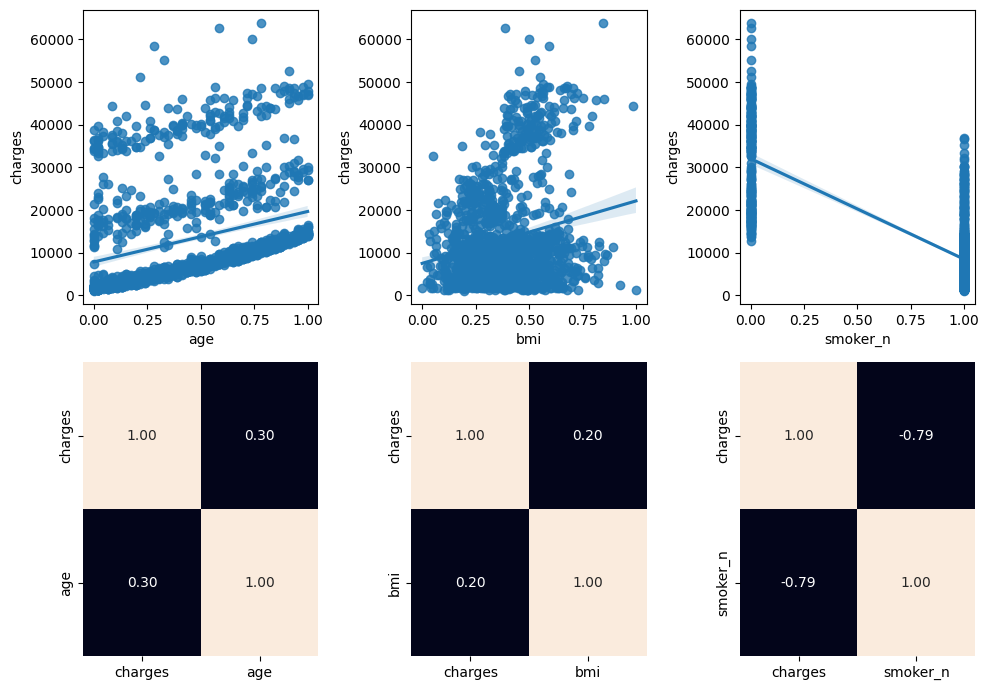

In [13]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()

plt.show()

la relación de las dos primeras predictoras es lineal pero no muy correlacionada, la relación con Smoker_n es inversa, no va a tener buena precisión 

In [14]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

Paso 2: Inicialización y entrenamiento del modelo¶

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 21701.79391257019
Coeficientes (b1, b2): [-23074.26173498  11586.30415359  11329.51105637]


Paso 3: Predicción del modelo

In [17]:
y_pred = model.predict(X_test)
y_pred

array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35841574.81814753
Coeficiente de determinación: 0.8049502474643171


un R2 de 80% está bien? puede explicar el 80% de los datos? 

paso 4 optimización de resultados por grid search 

In [19]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [20]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

ValueError: Invalid parameter 'C' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

no me deja optimizar hiperparámtros 